# ☞ Context:-
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.


# ☞ Content:-
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

# ☞ Problem statement:-
The aim of the project is to predict fraudulent credit card transactions using machine learning models. This is crucial from the bank’s as well as customer’s perspective. The banks cannot afford to lose their customers’ money to fraudsters. Every fraud is a loss to the bank as the bank is responsible for the fraud transactions.

# ☞ Data Variables :-
It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot have access to the original features and more background information about the data. 

●Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

●Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.

●The feature 'Amount' is the transaction Amount.

●Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

<img src='image.jpg'></img>

# Importing the dependencies

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# loading the dataset into a pandas DataFrame
df = pd.read_csv('creditcard.csv')

In [3]:
# having a vague idea of how the data looks
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# having a complete look of the data by tuning pandas setting
pd.set_option('max.columns',None)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#creating a function to rename all the columns to its lowercase form so it helps in writing code faster
def rename_cols(dataframe):
    cols = [var.lower() for var in dataframe.columns]
    dataframe.columns = cols
    return dataframe

In [6]:
df = rename_cols(df)
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory Data  Analysis

In [7]:
n_rows,n_cols = df.shape
print(f'➤ The dataset that is being used here contains {n_rows} rows and {n_cols} columns')

➤ The dataset that is being used here contains 284807 rows and 31 columns


In [8]:
# getting info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    284807 non-null  float64
 1   v1      284807 non-null  float64
 2   v2      284807 non-null  float64
 3   v3      284807 non-null  float64
 4   v4      284807 non-null  float64
 5   v5      284807 non-null  float64
 6   v6      284807 non-null  float64
 7   v7      284807 non-null  float64
 8   v8      284807 non-null  float64
 9   v9      284807 non-null  float64
 10  v10     284807 non-null  float64
 11  v11     284807 non-null  float64
 12  v12     284807 non-null  float64
 13  v13     284807 non-null  float64
 14  v14     284807 non-null  float64
 15  v15     284807 non-null  float64
 16  v16     284807 non-null  float64
 17  v17     284807 non-null  float64
 18  v18     284807 non-null  float64
 19  v19     284807 non-null  float64
 20  v20     284807 non-null  float64
 21  v21     28

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
v1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
v2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
v3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
v4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
v5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
v6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
v7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
v8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
v9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [10]:
#checking the percentage of missing data
df.isna().mean()*100

time      0.0
v1        0.0
v2        0.0
v3        0.0
v4        0.0
v5        0.0
v6        0.0
v7        0.0
v8        0.0
v9        0.0
v10       0.0
v11       0.0
v12       0.0
v13       0.0
v14       0.0
v15       0.0
v16       0.0
v17       0.0
v18       0.0
v19       0.0
v20       0.0
v21       0.0
v22       0.0
v23       0.0
v24       0.0
v25       0.0
v26       0.0
v27       0.0
v28       0.0
amount    0.0
class     0.0
dtype: float64

In [11]:
#checking the distribution of legit and fraudulent transactions
df['class'].value_counts()

0    284315
1       492
Name: class, dtype: int64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

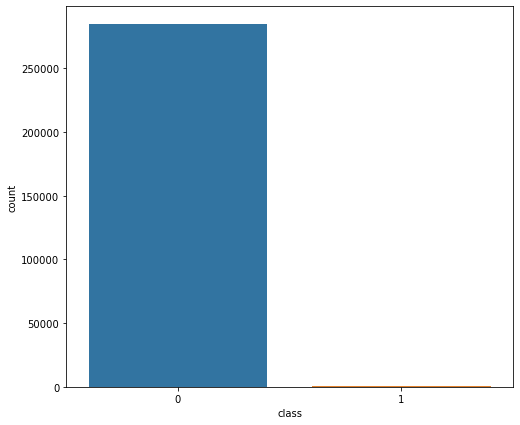

In [12]:
plt.figure(figsize=(8,7))
sns.countplot(df['class'])

<pre>Via this we can cleary see that the Data is highly unbalanced
0 --> Legit Transaction
1 --> Fraudulent Transaction</pre>

In [13]:
#separating the dataset into two new dataframes, one particularly for Legit Transactions and the other for Fraud Transactions for further analysis
legit_transaction = df[df['class'] == 0]
fraud_transaction = df[df['class'] == 1]

In [14]:
print(f'➤ The shape of legit transaction dataframe is {legit_transaction.shape}.')
print(f'➤ The shape of fraud transaction dataframe is {fraud_transaction.shape}.')

➤ The shape of legit transaction dataframe is (284315, 31).
➤ The shape of fraud transaction dataframe is (492, 31).


Text(0.5, 1.0, 'Time vs Amount graph for Legit transactions')

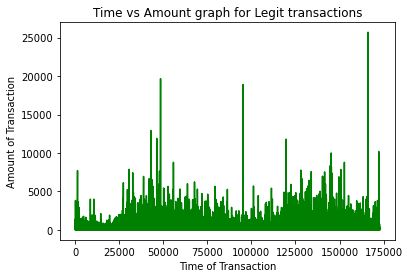

In [15]:
plt.plot(legit_transaction['time'],legit_transaction['amount'],c='g')
plt.xlabel('Time of Transaction')
plt.ylabel('Amount of Transaction')
plt.title('Time vs Amount graph for Legit transactions')

Text(0.5, 1.0, 'Time vs Amount graph for Fraud Transactions')

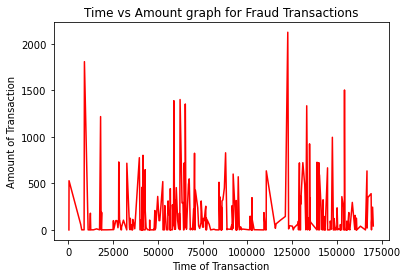

In [16]:
plt.plot(fraud_transaction['time'],fraud_transaction['amount'],c='r')
plt.xlabel('Time of Transaction')
plt.ylabel('Amount of Transaction')
plt.title('Time vs Amount graph for Fraud Transactions')

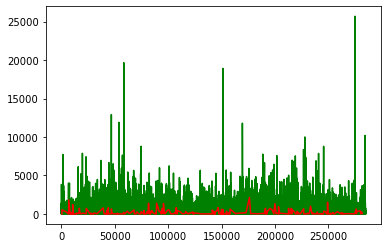

In [17]:
plt.plot(legit_transaction['amount'],c='g')
plt.plot(fraud_transaction['amount'],c='r')

In [18]:
# checking what are the statistics of the amount of transactions for legit transactions
legit_transaction['amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: amount, dtype: float64

In [19]:
print(f'➤ For legit transactions the average transaction amount is {legit_transaction.amount.mean()} US $ and the maximum amount of transaction is {legit_transaction.amount.max()} US $')


➤ For legit transactions the average transaction amount is 88.29102242225574 US $ and the maximum amount of transaction is 25691.16 US $


In [20]:
# checking what are the statistics of the amount of transactions for fraudulent transactions
fraud_transaction['amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: amount, dtype: float64

In [21]:
print(f'➤ For legit transactions the average transaction amount is {fraud_transaction.amount.mean()} US $ and the maximum amount of transaction is {fraud_transaction.amount.max()} US $')


➤ For legit transactions the average transaction amount is 122.21132113821133 US $ and the maximum amount of transaction is 2125.87 US $


In [22]:
#comparing the values of both the transactions
df.groupby('class').mean()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


*As the data is highly imbalanced what we'll do is we will balance the data using undersampling. As the number of legit transactions are way too more we will randomly grab the same number of legit transaction and concatenate it with our fraud dataframe so the data becomes balanced and hence we will be able to build a decent model.*

In [23]:
print(f'➤ The number of rows to be randomly grabbed from our legit dataframe is the same as number of rows in fraud dataframe i.e {fraud_transaction.shape[0]}')

➤ The number of rows to be randomly grabbed from our legit dataframe is the same as number of rows in fraud dataframe i.e 492


In [24]:
#grabbing 492 rows randomly from our legit transaction dataframe
legit_transaction_sample = legit_transaction.sample(n=fraud_transaction.shape[0])

In [25]:
legit_transaction_sample.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
273720,165671.0,2.291814,-1.530826,-0.112376,-1.635296,-1.636907,0.070116,-1.849132,0.063384,-0.697244,1.484969,-1.230975,-0.548537,1.309071,-1.030077,0.341161,0.103925,0.058399,0.428207,-0.303072,-0.367938,-0.126744,0.193089,0.344866,0.457532,-0.475163,-0.247887,0.067090,-0.025941,1.00,0
1333,1041.0,0.811002,-0.857560,-0.449312,0.339345,-0.495669,-0.753461,0.493522,-0.283784,0.352969,-0.290805,-1.059512,-0.228329,-0.642691,0.330678,0.248059,-0.082797,-0.078272,-0.454032,0.404082,0.426461,0.035279,-0.397047,-0.377699,-0.027973,0.490279,1.094912,-0.150188,0.033439,274.72,0
53878,46192.0,-0.600829,0.885595,1.131084,-0.595290,0.503155,-0.831644,0.723732,-0.229802,-0.266844,-0.464516,-0.840121,0.260911,0.912861,-0.165037,0.252185,0.585386,-0.975948,-0.251901,-0.754673,-0.190881,-0.003760,-0.084617,-0.222028,-0.082319,-0.071457,0.080065,-0.237597,0.016280,4.70,0
284502,172505.0,1.973960,0.052177,-2.957425,0.067665,1.803260,0.766479,0.348749,0.172767,-0.025641,-0.310939,1.136881,0.331755,-0.845797,-0.352838,0.021122,-0.653322,1.247068,-0.722254,-0.571868,-0.255448,0.109514,0.515239,-0.031940,-0.988890,0.218560,0.796254,-0.063861,-0.076795,14.00,0
100570,67556.0,-0.961339,3.111365,-3.327712,1.420151,0.294814,-1.779569,0.067394,0.817044,-0.018380,-0.434178,0.132712,-0.001163,0.771331,-3.240312,1.011210,1.145206,2.970267,1.611009,-0.360528,0.416147,-0.214770,-0.292438,0.189489,-0.460909,-0.116914,-0.375221,0.142739,-0.158457,0.89,0


In [26]:
#concatinating the legit transaction data sample and the fraud dataframe to get the final dataframe
final_df = pd.concat([legit_transaction_sample,fraud_transaction],axis=0)

In [27]:
final_df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
273720,165671.0,2.291814,-1.530826,-0.112376,-1.635296,-1.636907,0.070116,-1.849132,0.063384,-0.697244,1.484969,-1.230975,-0.548537,1.309071,-1.030077,0.341161,0.103925,0.058399,0.428207,-0.303072,-0.367938,-0.126744,0.193089,0.344866,0.457532,-0.475163,-0.247887,0.067090,-0.025941,1.00,0
1333,1041.0,0.811002,-0.857560,-0.449312,0.339345,-0.495669,-0.753461,0.493522,-0.283784,0.352969,-0.290805,-1.059512,-0.228329,-0.642691,0.330678,0.248059,-0.082797,-0.078272,-0.454032,0.404082,0.426461,0.035279,-0.397047,-0.377699,-0.027973,0.490279,1.094912,-0.150188,0.033439,274.72,0
53878,46192.0,-0.600829,0.885595,1.131084,-0.595290,0.503155,-0.831644,0.723732,-0.229802,-0.266844,-0.464516,-0.840121,0.260911,0.912861,-0.165037,0.252185,0.585386,-0.975948,-0.251901,-0.754673,-0.190881,-0.003760,-0.084617,-0.222028,-0.082319,-0.071457,0.080065,-0.237597,0.016280,4.70,0
284502,172505.0,1.973960,0.052177,-2.957425,0.067665,1.803260,0.766479,0.348749,0.172767,-0.025641,-0.310939,1.136881,0.331755,-0.845797,-0.352838,0.021122,-0.653322,1.247068,-0.722254,-0.571868,-0.255448,0.109514,0.515239,-0.031940,-0.988890,0.218560,0.796254,-0.063861,-0.076795,14.00,0
100570,67556.0,-0.961339,3.111365,-3.327712,1.420151,0.294814,-1.779569,0.067394,0.817044,-0.018380,-0.434178,0.132712,-0.001163,0.771331,-3.240312,1.011210,1.145206,2.970267,1.611009,-0.360528,0.416147,-0.214770,-0.292438,0.189489,-0.460909,-0.116914,-0.375221,0.142739,-0.158457,0.89,0


In [28]:
final_df.shape

(984, 31)

In [29]:
final_df['class'].value_counts()

0    492
1    492
Name: class, dtype: int64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

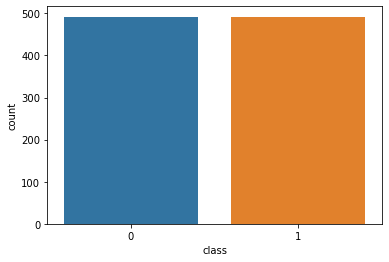

In [30]:
sns.countplot(final_df['class'])

In [31]:
final_df.groupby('class').mean()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,92563.849593,0.069897,-0.094377,-0.007219,0.053682,-0.030288,-0.095296,-0.035472,0.048094,0.000698,0.004162,-0.026447,0.049378,-0.063272,0.001487,0.050484,0.006417,0.020051,-0.023442,-0.007812,-0.006895,0.006857,-0.040906,0.018670,0.011564,-0.000342,0.011222,0.001733,-0.015187,87.495671
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [32]:
#creating a function which will split the dataframe into features and target dataframes
def features_and_target(dataframe):
    X = dataframe.drop('class',axis=1)
    y = dataframe['class']
    
    return X,y

In [33]:
X,y = features_and_target(final_df)

In [34]:
X

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
273720,165671.0,2.291814,-1.530826,-0.112376,-1.635296,-1.636907,0.070116,-1.849132,0.063384,-0.697244,1.484969,-1.230975,-0.548537,1.309071,-1.030077,0.341161,0.103925,0.058399,0.428207,-0.303072,-0.367938,-0.126744,0.193089,0.344866,0.457532,-0.475163,-0.247887,0.067090,-0.025941,1.00
1333,1041.0,0.811002,-0.857560,-0.449312,0.339345,-0.495669,-0.753461,0.493522,-0.283784,0.352969,-0.290805,-1.059512,-0.228329,-0.642691,0.330678,0.248059,-0.082797,-0.078272,-0.454032,0.404082,0.426461,0.035279,-0.397047,-0.377699,-0.027973,0.490279,1.094912,-0.150188,0.033439,274.72
53878,46192.0,-0.600829,0.885595,1.131084,-0.595290,0.503155,-0.831644,0.723732,-0.229802,-0.266844,-0.464516,-0.840121,0.260911,0.912861,-0.165037,0.252185,0.585386,-0.975948,-0.251901,-0.754673,-0.190881,-0.003760,-0.084617,-0.222028,-0.082319,-0.071457,0.080065,-0.237597,0.016280,4.70
284502,172505.0,1.973960,0.052177,-2.957425,0.067665,1.803260,0.766479,0.348749,0.172767,-0.025641,-0.310939,1.136881,0.331755,-0.845797,-0.352838,0.021122,-0.653322,1.247068,-0.722254,-0.571868,-0.255448,0.109514,0.515239,-0.031940,-0.988890,0.218560,0.796254,-0.063861,-0.076795,14.00
100570,67556.0,-0.961339,3.111365,-3.327712,1.420151,0.294814,-1.779569,0.067394,0.817044,-0.018380,-0.434178,0.132712,-0.001163,0.771331,-3.240312,1.011210,1.145206,2.970267,1.611009,-0.360528,0.416147,-0.214770,-0.292438,0.189489,-0.460909,-0.116914,-0.375221,0.142739,-0.158457,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [35]:
y

273720    0
1333      0
53878     0
284502    0
100570    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: class, Length: 984, dtype: int64

In [36]:
#splitting the features and target data further into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [37]:
print(f'➤ The shape of X_train is {X_train.shape}')
print(f'➤ The shape of X_test is {X_test.shape}')
print(f'➤ The shape of y_train is {y_train.shape}')
print(f'➤ The shape of y_test is {y_test.shape}')

➤ The shape of X_train is (787, 30)
➤ The shape of X_test is (197, 30)
➤ The shape of y_train is (787,)
➤ The shape of y_test is (197,)


In [38]:
#all the columns are scaled using PCA except amount so we will scale the amount column using standardization
scaler = StandardScaler()
scaler.fit_transform(X_train[['amount']])
scaler.transform(X_test[['amount']])

array([[-4.37339782e-01],
       [-4.37339782e-01],
       [-6.71701374e-02],
       [-4.08593638e-01],
       [-3.02098420e-01],
       [-4.20865384e-01],
       [-3.99305776e-01],
       [-3.71316109e-01],
       [-4.35070350e-01],
       [ 6.31100599e-01],
       [-4.37339782e-01],
       [-4.30489458e-01],
       [-4.19604588e-01],
       [ 6.59972822e-01],
       [-4.36373172e-01],
       [-4.34187792e-01],
       [-3.94388672e-01],
       [-4.25866540e-01],
       [ 9.04315047e-01],
       [-4.36373172e-01],
       [-3.14538272e-01],
       [-4.36373172e-01],
       [-3.99095643e-01],
       [-4.36373172e-01],
       [ 5.95398397e-02],
       [-2.81295289e-01],
       [ 2.78016905e+00],
       [-4.40575824e-01],
       [ 2.17517552e-01],
       [-4.37381808e-01],
       [-4.36373172e-01],
       [-4.32254572e-01],
       [-4.33053076e-01],
       [-1.88416666e-01],
       [ 1.98813714e+00],
       [-3.77536035e-01],
       [-2.19684402e-01],
       [ 7.13976909e-01],
       [ 4.0

# Model Training

In [39]:
classifier = LogisticRegression()

In [40]:
#training the model
classifier.fit(X_train,y_train)

LogisticRegression()

# Model Evaluation

In [43]:
#using accuracy score to evaluate our model as our data is balanced
#firstly checking how the model performs with the training data itself
print(f'▶ The accuracy score of our Logistic Regression model for training data is : {accuracy_score(y_train,classifier.predict(X_train))}')
# checking the accuracy of our model with the testing data
print(f'▶ The accuracy score of our Logistic Regression model for testing data is : {accuracy_score(y_test,classifier.predict(X_test))}')

▶ The accuracy score of our Logistic Regression model for training data is : 0.9326556543837357
▶ The accuracy score of our Logistic Regression model for testing data is : 0.9441624365482234
